# 여행자 보험 데이터 - 보험금 청구 여부 분류

## 1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
travel_insurance = pd.read_csv('./data/travel_insurance.csv')

In [3]:
travel_insurance.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
travel_insurance.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [5]:
# column명이 마음에 들지 않아 변경
travel_insurance.rename(columns={'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel',
                                 'Product Name':'Product_Name', 'Net Sales':'Net_Sales',
                                 'Commision (in value)':'Commision_in_value'}, inplace=True)

In [6]:
travel_insurance.columns

Index(['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name',
       'Claim', 'Duration', 'Destination', 'Net_Sales', 'Commision_in_value',
       'Gender', 'Age'],
      dtype='object')

- Agency : 보험 판매점
- Agency Type : 판매점 형태
- Distribution Channel : 판매채널
- Product Name : 판매 상품 종류
- Duration : 보험기간
- Destination : 여행국가
- Net Sales : 순마진
- Commision (in value) : 수수료
- Gender : 성별
- Age : 나이
- Claim : 보험금 청구 -> Y

## 2. 데이터 전처리

In [7]:
travel_insurance.shape

(63326, 11)

In [8]:
travel_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency_Type           63326 non-null  object 
 2   Distribution_Channel  63326 non-null  object 
 3   Product_Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net_Sales             63326 non-null  float64
 8   Commision_in_value    63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


### 2-1. 결측치 제거

In [9]:
travel_insurance.isnull().sum() # Gender에만 결측치가 존재함. 심지어 많음

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commision_in_value          0
Gender                  45107
Age                         0
dtype: int64

In [10]:
travel_insurance['Gender'].unique() # 성별을 모르는 경우가 많다.

array(['F', nan, 'M'], dtype=object)

In [11]:
# nan을 'None'이라는 모른다는 표시의 문자열로 변환
travel_insurance['Gender'] = travel_insurance['Gender'].fillna('None')

In [12]:
travel_insurance.isnull().sum() # 결측치가 제거됨

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Claim                   0
Duration                0
Destination             0
Net_Sales               0
Commision_in_value      0
Gender                  0
Age                     0
dtype: int64

### 2-2. 이상치 탐지

In [13]:
# column 중에서 float, int에만 적용
travel_insurance.describe()

,Duration,Net_Sales,Commision_in_value,Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
%matplotlib inline

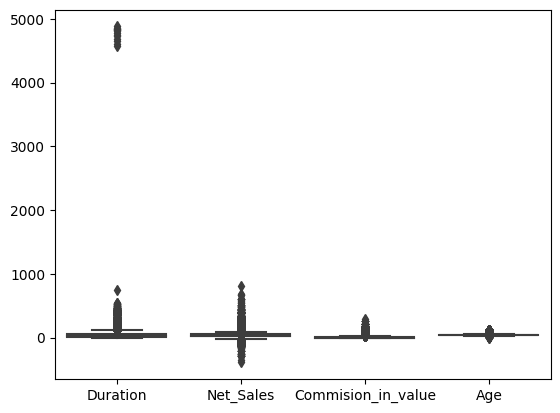

In [15]:
bplot = sns.boxplot(data=travel_insurance) # Duration에 매우 큰 이상치가 몰려있다.

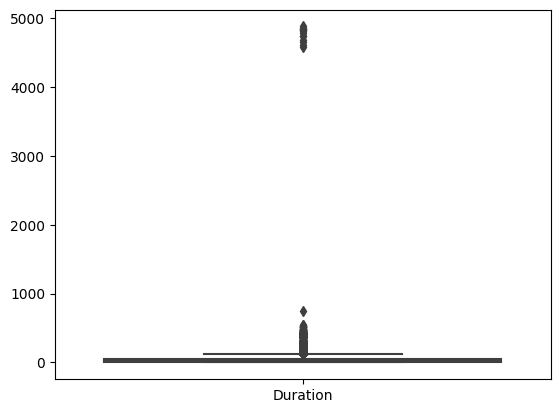

In [16]:
bplot= sns.boxplot(data= travel_insurance[['Duration']])

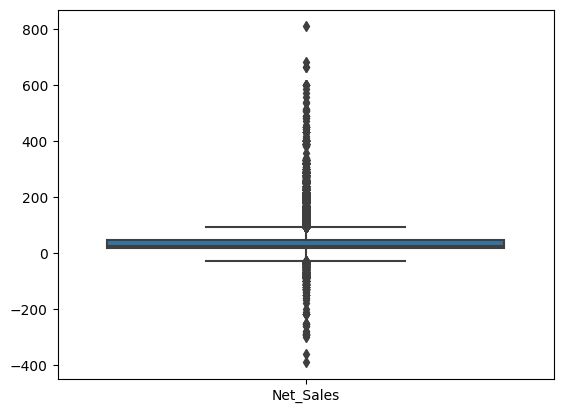

In [17]:
bplot= sns.boxplot(data= travel_insurance[['Net_Sales']])

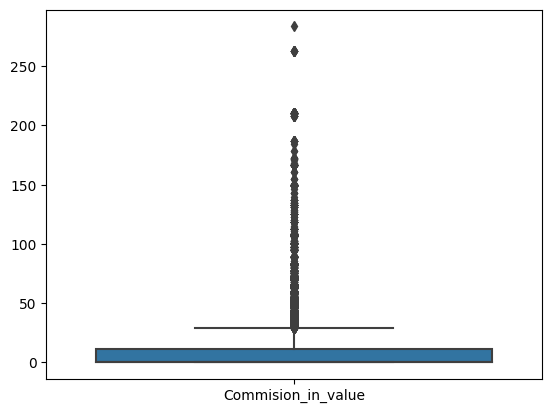

In [18]:
bplot= sns.boxplot(data= travel_insurance[['Commision_in_value']])

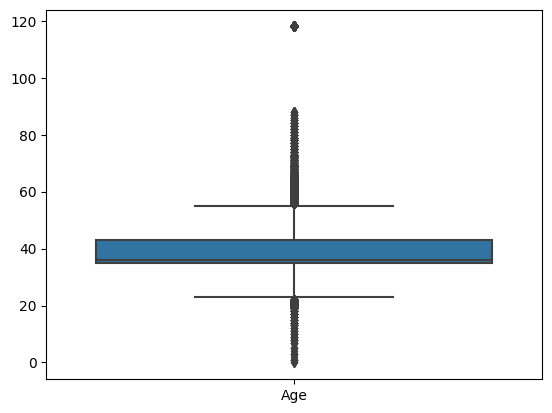

In [19]:
bplot= sns.boxplot(data= travel_insurance[['Age']])

### 2-3. 이상치 제거
먼저 이상치를 제거하지 않고 일단은 먼저 진행

In [20]:
import numpy as np

In [21]:
def get_outlier(df=None, column=None, weight=1.5):
    q25 = np.percentile(df[column].values, 25)
    q75 = np.percentile(df[column].values, 75)
    
    IQR = q75-q25
    IQR_weight = IQR * weight
    
    lowest = q25 - IQR_weight
    highest = q75 + IQR_weight
    
    outlier_idx = df[column][(df[column]<lowest)|(df[column]>highest)].index
    
    return outlier_idx

In [22]:
# 이상치 제거할려면 '원하는 column' 부분 수정하고 주석 풀기
# column_outlier_idx = get_outlier(df=travel_insurance, column='원하는 column')
# travel_insurance.drop(column_outlier_idx, inplace=True)

## 3. 탐색적 자료분석(EDA)

In [23]:
travel_insurance.columns

Index(['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name',
       'Claim', 'Duration', 'Destination', 'Net_Sales', 'Commision_in_value',
       'Gender', 'Age'],
      dtype='object')

### 3-1. 범주형(빈도분석)

Text(0.5, 1.0, 'Claim')

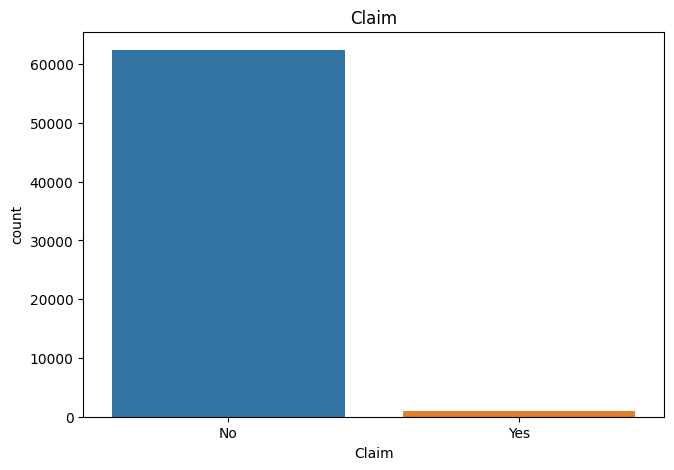

In [24]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'Claim', data = travel_insurance)
plt.title('Claim')

Text(0.5, 1.0, 'Agency_Type')

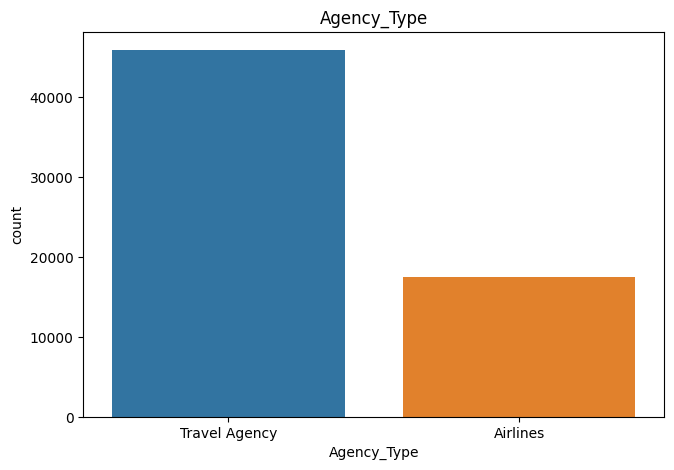

In [25]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'Agency_Type', data = travel_insurance)
plt.title('Agency_Type')

Text(0.5, 1.0, 'Product_Name')

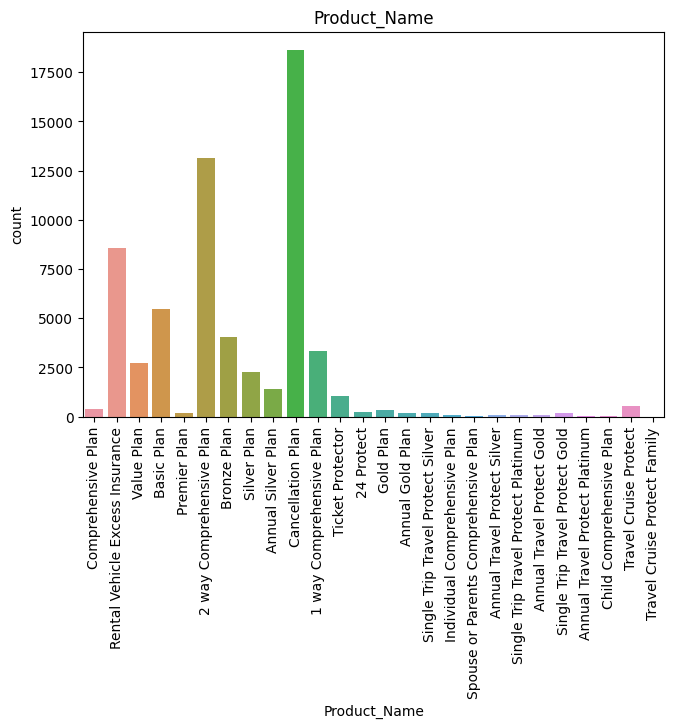

In [26]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'Product_Name', data = travel_insurance)
plt.xticks(rotation=90)
plt.title('Product_Name')

Text(0.5, 1.0, 'Distribution_Channel')

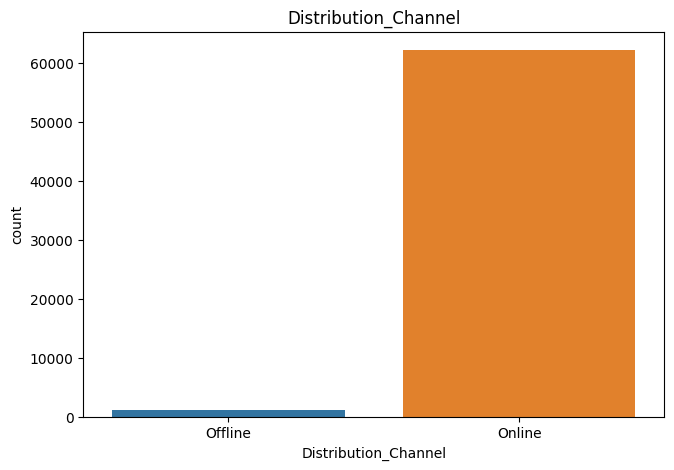

In [27]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'Distribution_Channel', data = travel_insurance)
plt.title('Distribution_Channel')

Text(0.5, 1.0, 'Gender')

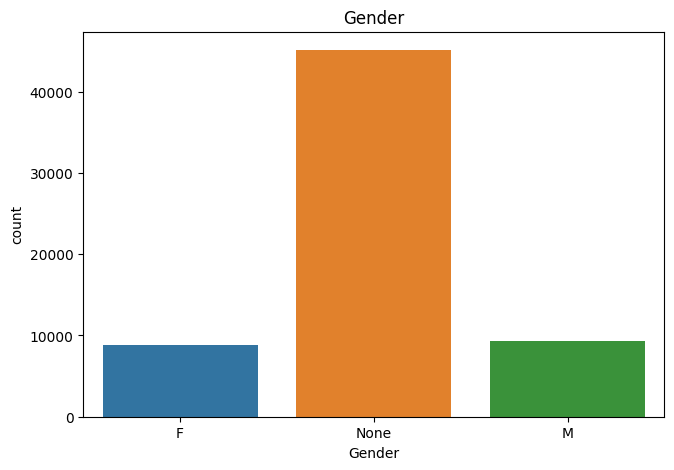

In [28]:
plt.figure(figsize=(7.5,5))
sns.countplot(x = 'Gender', data = travel_insurance)
plt.title('Gender')

Text(0.5, 1.0, 'Destination')

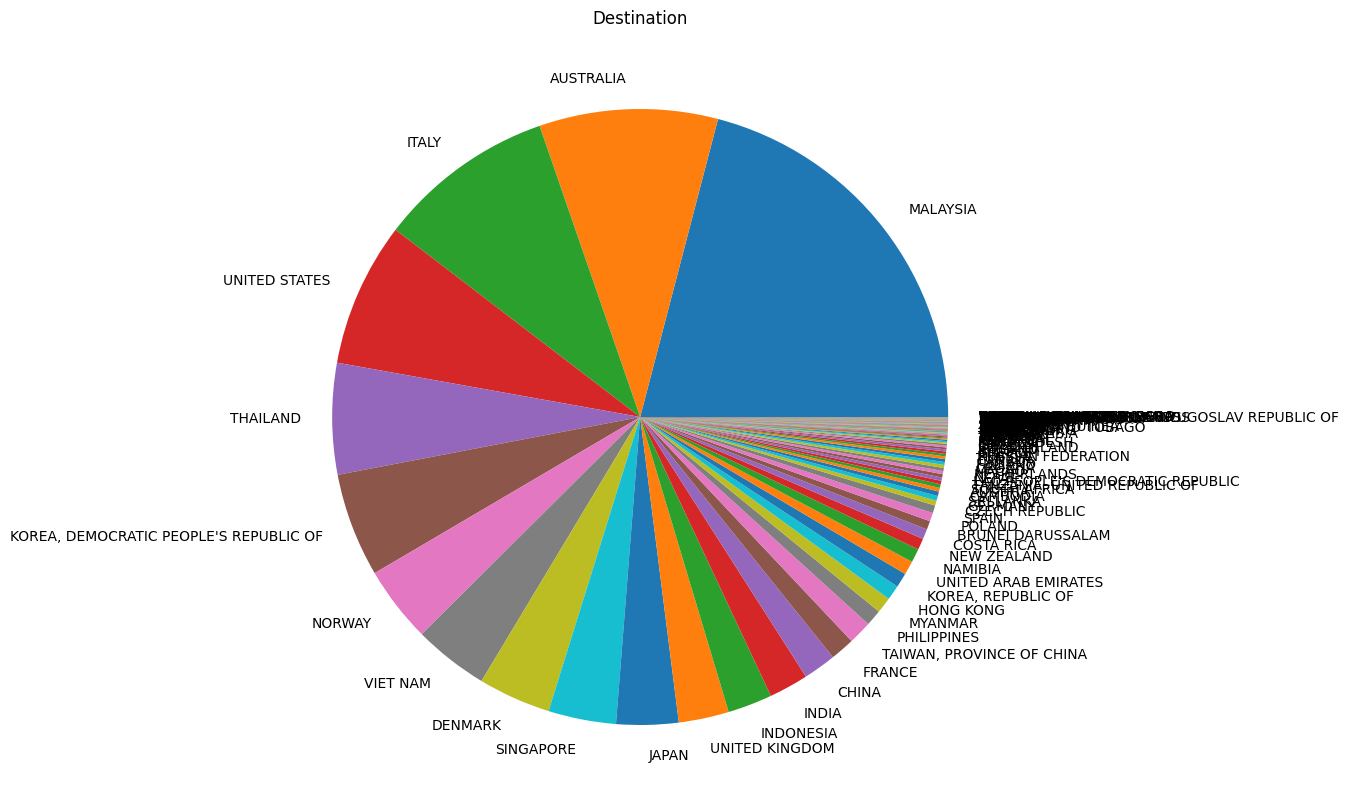

In [29]:
plt.figure(figsize=(15,10))
plt.pie(travel_insurance['Destination'].value_counts(),
        labels=travel_insurance['Destination'].unique())
plt.title('Destination')

### 3-2. 종속변수 y

Text(0.5, 1.0, 'Number of Travel Claimed vs Non-Claimed')

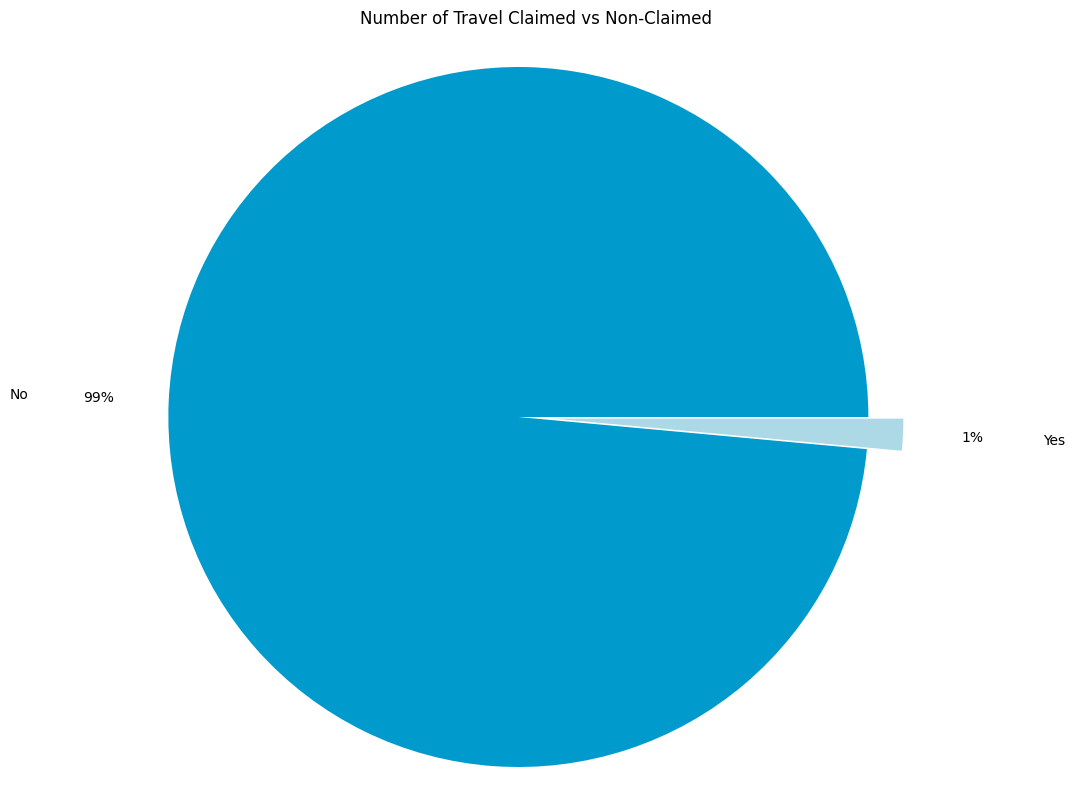

In [30]:
plt.figure(figsize=[10,10])
sorted_counts= travel_insurance.Claim.value_counts()
plt.pie(sorted_counts, explode=(0.1,0),labels=['No', 'Yes'],
       colors=['#009ACD', '#ADD8E6'], autopct='%1.0f%%',
       shadow=False, startangle=0,
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.title("Number of Travel Claimed vs Non-Claimed")

# 불균형이 상당히 심한 불균형 데이터

### 3-3. 연속형

<Axes: xlabel='Duration', ylabel='Density'>

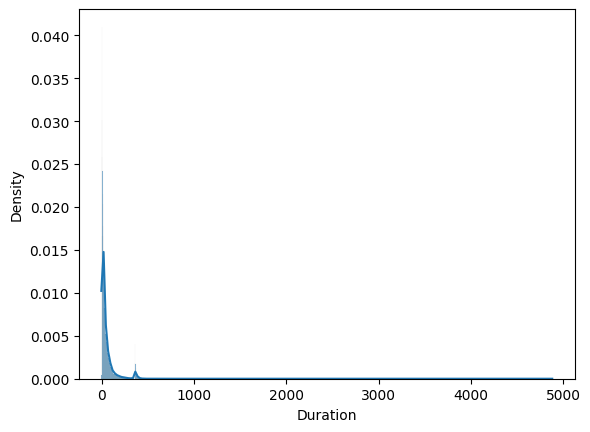

In [31]:
# 오른쪽으로 꼬리가 긴 분포를 띈다.
sns.histplot(travel_insurance["Duration"], kde=True, stat="density")

<Axes: xlabel='Net_Sales', ylabel='Density'>

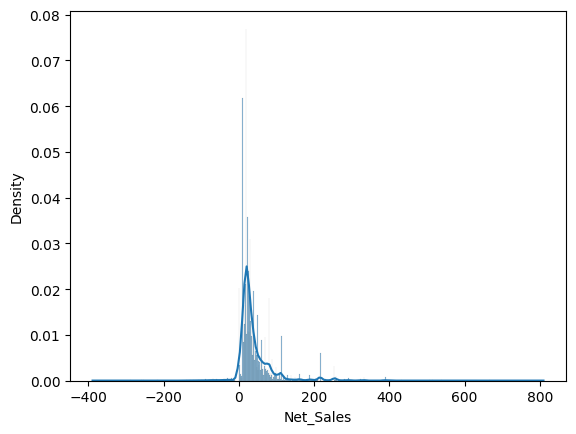

In [32]:
sns.histplot(travel_insurance["Net_Sales"], kde=True, stat="density")

<Axes: xlabel='Commision_in_value', ylabel='Density'>

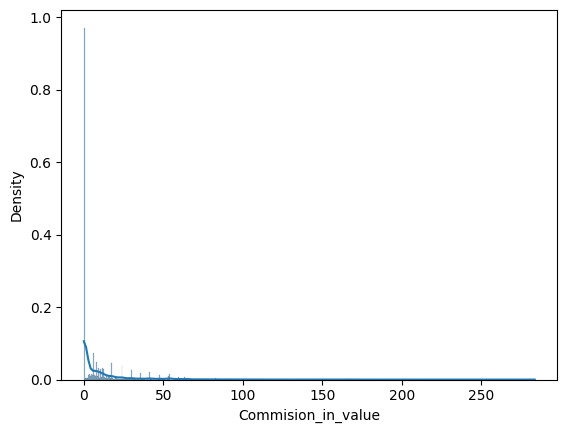

In [33]:
# 0인 경우가 대부분이다
sns.histplot(travel_insurance["Commision_in_value"], kde=True, stat="density")

<Axes: xlabel='Age', ylabel='Density'>

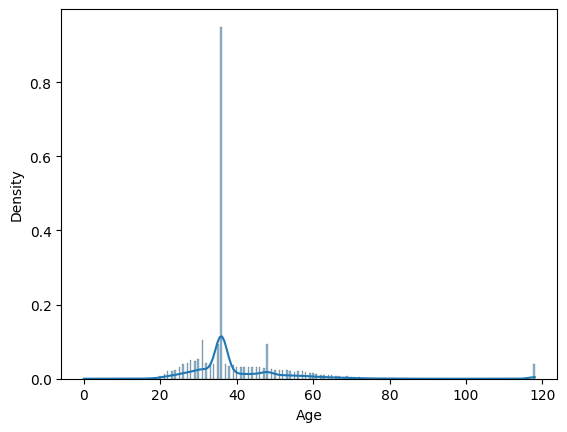

In [34]:
sns.histplot(travel_insurance["Age"], kde=True, stat="density")

### 3-4. 연속형 독립변수 상관관계

In [35]:
# 상관관계 분석할 때는 연속형 or 양적 변수만 하기!!!
corr = travel_insurance.corr(method = 'pearson')
corr

/var/folders/by/whxzj3ld0zz4d056gwdb3r380000gn/T/ipykernel_61570/3747837612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = travel_insurance.corr(method = 'pearson')


,Duration,Net_Sales,Commision_in_value,Age
Duration,1.000000,0.429235,0.344772,0.002468
Net_Sales,0.429235,1.000000,0.651315,0.037756
Commision_in_value,0.344772,0.651315,1.000000,0.118348
Age,0.002468,0.037756,0.118348,1.000000


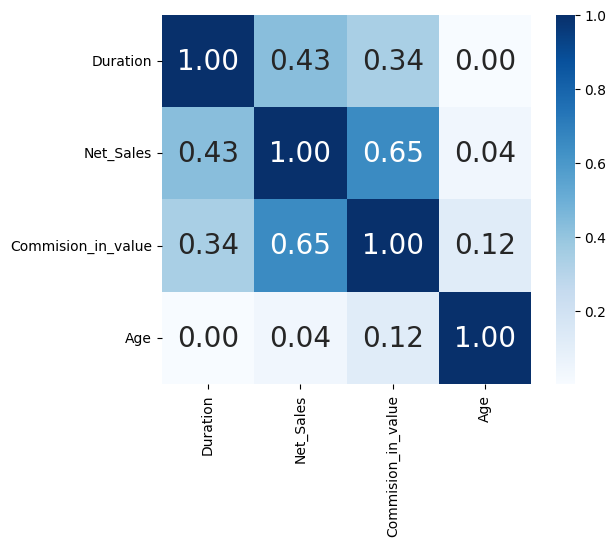

In [36]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


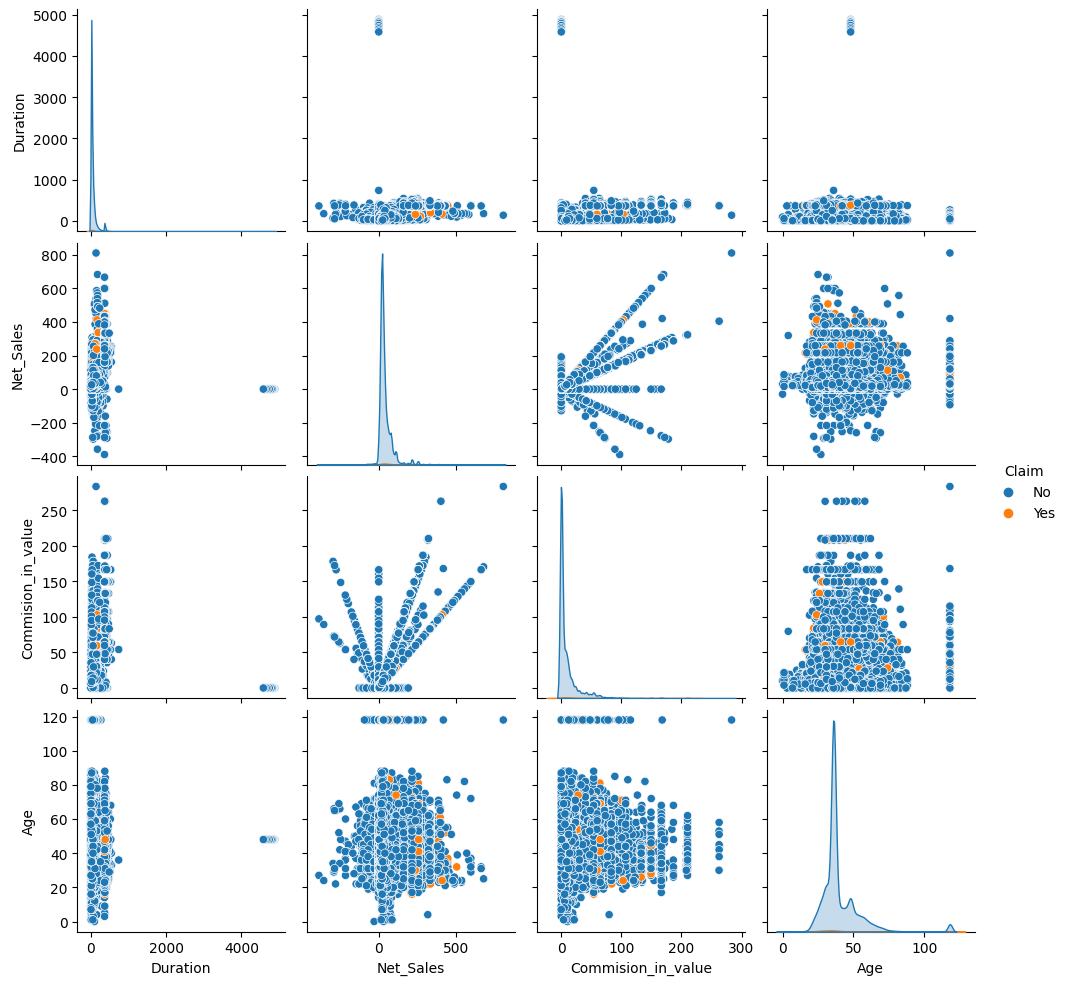

In [37]:
# hue 옵션으로 구분해서 볼수도 있다. (시간이 다소 걸림)
sns.pairplot(data=travel_insurance,hue="Claim")
plt.show()
plt.close()
# 당장 연속형 독립변수로만 보험금 청부 여부를 분리하기에는 어려워 보임

## 4. 모델링

### 4-1. 모델링을 위한 전처리

In [38]:
from sklearn import preprocessing

In [39]:
label_encoder1 = preprocessing.LabelEncoder()
travel_insurance['Agency']= label_encoder1.fit_transform(travel_insurance['Agency'])

label_encoder2 = preprocessing.LabelEncoder()
travel_insurance['Agency_Type']= label_encoder2.fit_transform(travel_insurance['Agency_Type'])

label_encoder3 = preprocessing.LabelEncoder()
travel_insurance['Distribution_Channel']= label_encoder3.fit_transform(travel_insurance['Distribution_Channel'])

label_encoder4 = preprocessing.LabelEncoder()
travel_insurance['Product_Name']= label_encoder4.fit_transform(travel_insurance['Product_Name'])

label_encoder5 = preprocessing.LabelEncoder()
travel_insurance['Claim']= label_encoder5.fit_transform(travel_insurance['Claim'])

label_encoder6 = preprocessing.LabelEncoder()
travel_insurance['Destination']= label_encoder6.fit_transform(travel_insurance['Destination'])

In [40]:
column_names = ["Agency", "Agency_Type", "Distribution_Channel","Product_Name","Duration","Destination","Net_Sales","Commision_in_value","Age","Claim"]
travel_insurance = travel_insurance.reindex(columns=column_names)

In [41]:
travel_insurance.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision_in_value,Age,Claim
0,3,1,0,12,186,79,-29.0,9.57,81,0
1,3,1,0,12,186,79,-29.0,9.57,71,0
2,6,1,1,16,65,4,-49.5,29.70,32,0
3,6,1,1,16,60,4,-39.6,23.76,32,0
4,6,1,1,16,79,61,-19.8,11.88,41,0


In [42]:
y= travel_insurance.iloc[:,[-1]]
X= travel_insurance.drop(y.columns,axis = 1)

### 4-2. 데이터 분할

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y['Claim'])

### 4-3. 불균형 상태(전체 보험금 청구가 1% 수준인 데이터셋)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [46]:
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9852616064848931

### 4-4. 균형 상태(전체 보험금 청구가 50% 수준인 데이터셋)

In [47]:
# ! pip install imblearn
# 불균형 데이터를 다루기 위한 패키지
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')
print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (63326, 9)
Shape of X after SMOTE: (124798, 9)

Balance of positive and negative classes (%):


Claim
0        50.0
1        50.0
dtype: float64

In [48]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=3)

In [49]:
kn = KNeighborsClassifier()

In [50]:
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

/Users/kwonkihyeon/opt/anaconda3/envs/untitled/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9406650641025641